In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numba as nb
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from scipy.optimize import minimize

from aeons.covariance import logX_mu, logX_covinv_chol, points_at_iteration, logPr

# Load test samples
from aeons.tools import pickle_in
samples_g_1, samples_c_1, samples_w_1 = pickle_in("../test_samples/samples_1.pickle")

from true_distribution import generate_Xsamples

Can change:

- Total iterations, iterations investigated
- $n_\text{live}$

- Number of points sampled/number of bins in histogram

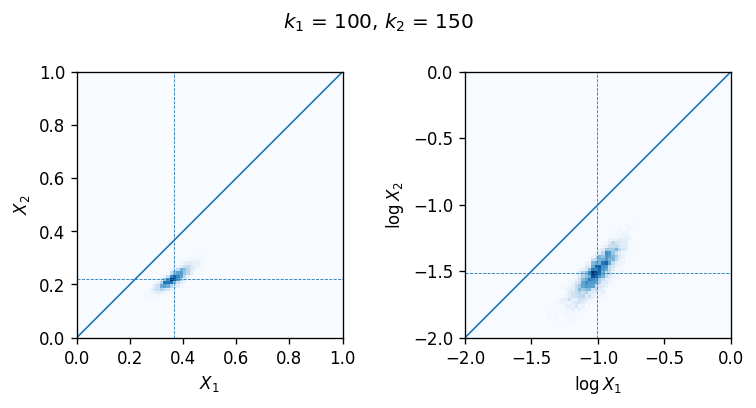

In [2]:
nlive = 100
iterations = 200

iteration_1 = 100
iteration_2 = 150
n_samples = 5000
bins = 80
logXrange = [-2, 0]

nk = nlive * np.ones(iterations)
logX1_mean = logX_mu(nk)[iteration_1]
logX2_mean = logX_mu(nk)[iteration_2]
X1_mean = np.exp(logX1_mean)
X2_mean = np.exp(logX2_mean)

X1samples, X2samples = generate_Xsamples(nk, n_samples, [iteration_1, iteration_2]).T

fig, axs = plt.subplots(1, 2, dpi=120)

# Plot Xs
axs[0].hist2d(X1samples, X2samples, bins=bins, cmap='Blues', range=[[0,1], [0,1]]);
# sns.kdeplot(x=X1samples, y=X2samples, levels=[0.2, 0.5, 0.68, 0.95], linewidth=0.1)
x0 = np.linspace(0, 1, 100)
axs[0].plot(x0, x0, lw=1)
axs[0].axvline(x=X1_mean, lw=0.5, ls='--')
axs[0].axhline(y=X2_mean, lw=0.5, ls='--')
axs[0].set_xlabel("$X_1$")
axs[0].set_ylabel("$X_2$");
axs[0].set_aspect('equal');

# Plot logXs
axs[1].hist2d(np.log(X1samples), np.log(X2samples), bins=bins, cmap='Blues', range=[logXrange, logXrange]);
# sns.kdeplot(x=X1samples, y=X2samples, levels=[0.2, 0.5, 0.68, 0.95], linewidth=0.1)
x0 = np.linspace(*logXrange, 100)
axs[1].plot(x0, x0, lw=1)
axs[1].axvline(x=logX1_mean, lw=0.5, ls='--')
axs[1].axhline(y=logX2_mean, lw=0.5, ls='--')
axs[1].set_xlabel("$\log X_1$")
axs[1].set_ylabel("$\log X_2$");
axs[1].set_aspect('equal')

plt.suptitle(f"$k_1$ = {iteration_1}, $k_2$ = {iteration_2}", y=0.8)
plt.tight_layout();

In [11]:
def X_contours(Xsamples, iteration_1, iteration_2, bins=80, logXrange=[-2,0]):
    X1samples = Xsamples[:, iteration_1]
    X2samples = Xsamples[:, iteration_2]
    
    fig, axs = plt.subplots(1, 2, dpi=120)

    # Plot Xs
    axs[0].hist2d(X1samples, X2samples, bins=bins, cmap='Blues', range=[[0,1], [0,1]]);
    # sns.kdeplot(x=X1samples, y=X2samples, levels=[0.2, 0.5, 0.68, 0.95], linewidth=0.1)
    x0 = np.linspace(0, 1, 100)
    axs[0].plot(x0, x0, lw=1)
    axs[0].set_xlabel("$X_1$")
    axs[0].set_ylabel("$X_2$");
    axs[0].set_aspect('equal');

    # Plot logXs
    axs[1].hist2d(np.log(X1samples), np.log(X2samples), bins=bins, cmap='Blues', range=[logXrange, logXrange]);
    # sns.kdeplot(x=X1samples, y=X2samples, levels=[0.2, 0.5, 0.68, 0.95], linewidth=0.1)
    x0 = np.linspace(*logXrange, 100)
    axs[1].plot(x0, x0, lw=1)
    axs[1].set_xlabel("$\log X_1$")
    axs[1].set_ylabel("$\log X_2$");
    axs[1].set_aspect('equal')

    plt.suptitle(f"$k_1$ = {iteration_1}, $k_2$ = {iteration_2}", y=0.8)
    plt.tight_layout();